<a href="https://colab.research.google.com/github/shadatsh/Spam-Detection-using-LSTM/blob/main/05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group No: 05
Subaharan. A    : EG/2019/3753
Shadatsharan. K :EG/2019/3744


## Project Description: Spam Detection Using LSTM
#### Project Overview:

This project aims to develop a deep learning model for predict the message as spam or not. The model is built using Long Short-Term Memory (LSTM) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: The dataset used is 'SPAM text message 20170820 - Data.csv' from Kaggle, containing labeled SMS messages for spam detection.

2- Data Preprocessing: Text cleaning involves removing HTML tags, replacing URLs with <URL>, and converting text to lowercase. The text data is tokenized, converted and padded to ensure uniform input lengths.

3- Model Building: An LSTM model is constructed with an embedding layer, 2 LSTM layers,  a dropout layer, and a dense output layer.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to detect the spam messages accurately.

## Code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Instaliing Libraries

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Read Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Intelligent systems Project/SPAM text message 20170820 - Data.csv',delimiter=',',encoding='latin-1')
df = df[['Category','Message']]
df = df[pd.notnull(df['Message'])]
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.index = range(5572) #set the index range of dataframe
df['Message'].apply(lambda x: len(x.split(' '))).sum() #get the number of total words in messages coloumn

87265

### Visualize the Data

<ipython-input-6-ded373282ae8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8, palette="viridis")


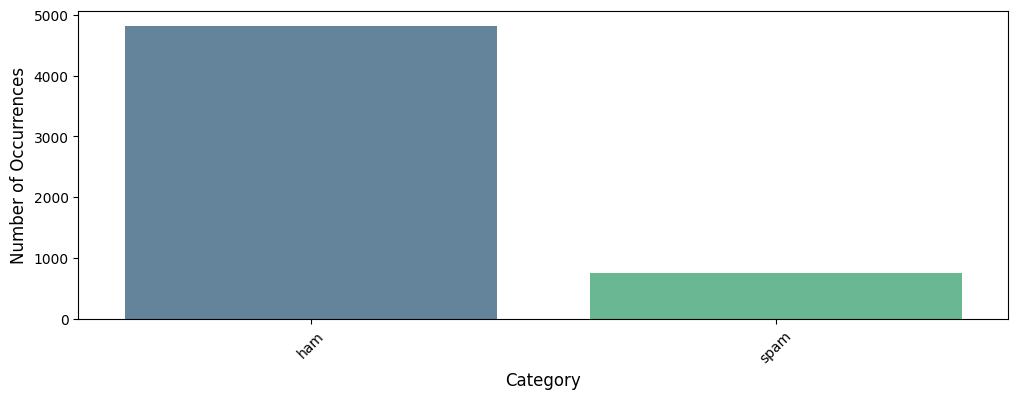

In [6]:
cnt_pro = df['Category'].value_counts()
plt.figure(figsize=(12,4))

# Pass x and y as keyword arguments
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8, palette="viridis")

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [7]:
def print_message(index):
    if index >= len(df):
        print(f"Index {index} is out of bounds.")
        return
    example = df[df.index == index][['Message', 'Category']].values[0]
    if len(example) > 0:
        print(f"Message: {example[0]}")
        print(f"Message Category: {example[1]}")

print_message(12)

Message: URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Message Category: spam


### Text Preprocessing

Define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [8]:
from bs4 import BeautifulSoup
import re

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text  # Remove HTML tags
    text = re.sub(r'\|\|\|', r' ', text)  # Replace '|||' with space
    text = re.sub(r'http\S+', r'<URL>', text)  # Replace URLs with '<URL>'
    text = text.lower()  # Convert text to lowercase
    return text

df['Message'] = df['Message'].apply(cleanText)

<ipython-input-8-e0483c71732e>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text  # Remove HTML tags


### Text Tokenization and Dataset Preparation for LSTM Model

In [25]:
### Text Tokenization and Dataset Preparation for LSTM Model
max_fatures = 20000 # The maximum number of words to be used.
MAX_SEQUENCE_LENGTH = 50  # Max number of words in each message.

tokenizer = Tokenizer(num_words=max_fatures, split=' ', lower=True)
tokenizer.fit_on_texts(df['Message'].values)

In [10]:
vocab_size = len(tokenizer.word_index) + 1  # Total number of words in vocabulary

In [11]:
vocab_size

8988

In [12]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'ur': 31,
 'get': 32,
 'will': 33,
 'if': 34,
 'be': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 '4': 41,
 'up': 42,
 'when': 43,
 'ok': 44,
 'free': 45,
 'go': 46,
 'how': 47,
 'from': 48,
 'all': 49,
 'out': 50,
 'what': 51,
 'know': 52,
 'like': 53,
 'good': 54,
 'then': 55,
 'got': 56,
 'come': 57,
 'was': 58,
 'its': 59,
 'am': 60,
 'time': 61,
 'day': 62,
 'only': 63,
 'love': 64,
 'there': 65,
 'send': 66,
 'he': 67,
 'want': 68,
 'text': 69,
 'as': 70,
 'txt': 71,
 'one': 72,
 'going': 73,
 'by': 74,
 "i'll": 75,
 'need': 76,
 'home': 77,
 'about': 78,
 'r': 79,
 'lor': 80,
 'sorry': 81,
 'still': 82,
 'see': 83,
 'stop': 84,


In [26]:
X = tokenizer.texts_to_sequences(df['Message'].values) #convert text messages into sequence of integers.
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5572, 50)


In [14]:
# One-hot encoding the 'Category' column
Y = pd.get_dummies(df['Category']).values  # One-hot encode the target variable

In [27]:
# Train-Test Split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train set shape: {X_train.shape}, {Y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {Y_val.shape}")
print(f"Test set shape: {X_test.shape}, {Y_test.shape}")

Train set shape: (3900, 50), (3900, 2)
Validation set shape: (836, 50), (836, 2)
Test set shape: (836, 50), (836, 2)


### Create LSTM Model

In [16]:
### **Creating the LSTM Model using Keras Embedding**
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [28]:
# Define the model
model = Sequential()
embedding_dim = 100  # Size of the embedding vectors

# Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH))

# First LSTM Layer (return_sequences=True to pass the sequence to the next LSTM)
model.add(LSTM(50, return_sequences=True))

# Dropout Layer to prevent overfitting
model.add(Dropout(0.2))

# Second LSTM Layer (final LSTM layer, return_sequences=False)
model.add(LSTM(50, return_sequences=False))

# Dense Layer (output layer for binary classification)
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Example batch to build the model
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


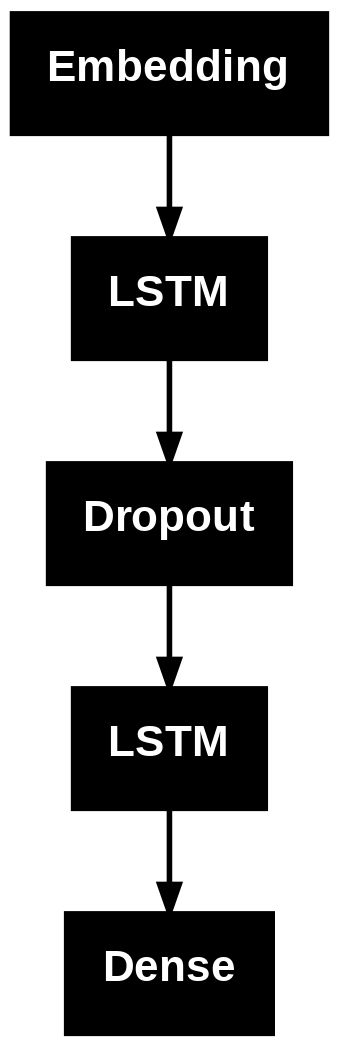

In [29]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [30]:
### Model Training with Early Stopping
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the validation set and early stopping
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=32,
                    verbose=2,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping])  # Add early stopping callback

Epoch 1/50
122/122 - 4s - 29ms/step - accuracy: 0.9400 - loss: 0.1870 - val_accuracy: 0.9785 - val_loss: 0.0775
Epoch 2/50
122/122 - 1s - 9ms/step - accuracy: 0.9900 - loss: 0.0428 - val_accuracy: 0.9821 - val_loss: 0.0638
Epoch 3/50
122/122 - 2s - 14ms/step - accuracy: 0.9962 - loss: 0.0174 - val_accuracy: 0.9868 - val_loss: 0.0529
Epoch 4/50
122/122 - 3s - 21ms/step - accuracy: 0.9987 - loss: 0.0089 - val_accuracy: 0.9833 - val_loss: 0.0569
Epoch 5/50
122/122 - 1s - 9ms/step - accuracy: 0.9990 - loss: 0.0065 - val_accuracy: 0.9880 - val_loss: 0.0531
Epoch 6/50
122/122 - 1s - 9ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9892 - val_loss: 0.0541
Epoch 7/50
122/122 - 1s - 10ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9892 - val_loss: 0.0566
Epoch 8/50
122/122 - 1s - 10ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9892 - val_loss: 0.0588


In [31]:
# Output the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 100)             │         898,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,847,908 (10.86 MB)

 Trainable params: 949,302 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,898,606 (7.24 MB)

### Validate the Model

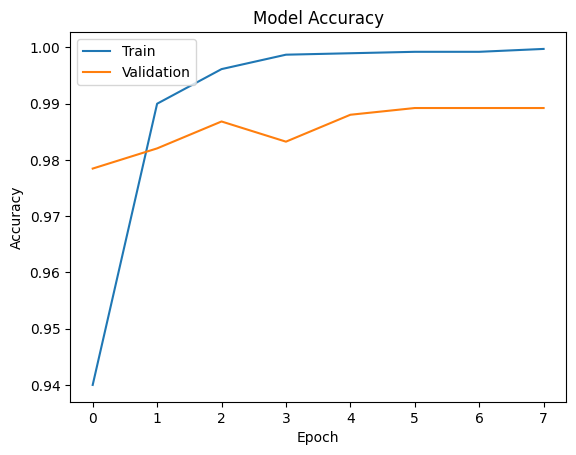

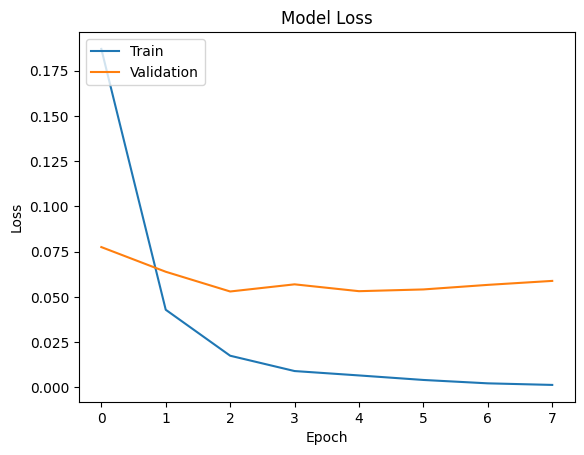

In [32]:
### Visualization of Accuracy and Loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the test set
yhat_probs = model.predict(X_test, verbose=0)

# Convert predicted probabilities to class labels
yhat_classes = np.argmax(yhat_probs, axis=1)

# Convert one-hot encoded test labels to class labels
Y_test_classes = np.argmax(Y_test, axis=1)

In [34]:
### Classification Report
# Generate the classification report
class_report = classification_report(Y_test_classes, yhat_classes, target_names=['Ham', 'Spam'])

# Print the classification report
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       724
        Spam       1.00      0.96      0.98       112

    accuracy                           0.99       836
   macro avg       1.00      0.98      0.99       836
weighted avg       0.99      0.99      0.99       836



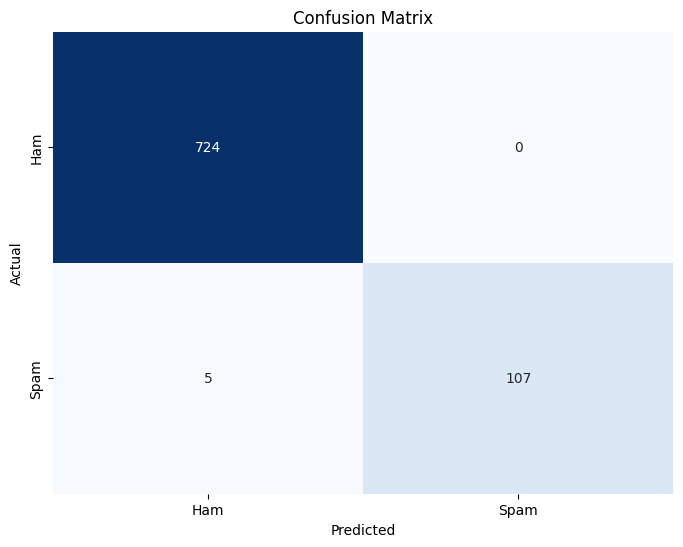

In [35]:
### Confusion Matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, yhat_classes)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
# Save the model
model.save('MymodelwithkerasEmbedding.h5')

## Inference


Test with new and different data set aside from the data to build the model.

In [37]:
message = ['Congratulations! You have WON a FREE iPhone! Claim it now by visiting www.prize.com. Limited time offer, act FAST!! 🚨']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[3.0577248e-05 9.9996936e-01]] spam


In [39]:
message = ['Congratulations! You have been selected for the training pool of International Mathematical Olympiad. Click here to register yourslef: www.olympiadinternational.com. Late registrations will not be accepted ']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['ham','spam']
print(pred, labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.5146226  0.48537734]] ham


#References

[1] Artificial Inteligence, Machine Learning and Deep Learning by Mercury Learning and Informarion (Book)

[2] Source Information of NLP :https://monkeylearn.com/what-is-text-classification/

[3] Parameter doc2vec and LSTM inspired by : https://dl.acm.org/doi/10.1145/3406601.3406624